# ttHbb variables preparation

In [1]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams["figure.figsize"] = (13, 6)
import pandas as pd
import seaborn as sns
sns.set(context = "paper", font = "monospace")
from sklearn.preprocessing import MinMaxScaler
import sqlite3
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

import root_pandas

Welcome to JupyROOT 6.08/06


# variables

- [ATL-COM-PHYS-2017-079](https://cds.cern.ch/record/2244360) (table 8, page 46)

|**variable**                                     |**type**                 |**n-tuple name**                  |**description**                                                                                                |*region >= 6j*|*region 5j*|
|-------------------------------------------------|-------------------------|----------------------------------|---------------------------------------------------------------------------------------------------------------|--------------|-----------|
|${\Delta R^{\text{avg}}_{bb}}$                   |general kinematic        |`dRbb_avg_Sort4`                  |average ${\Delta R}$ for all ${b}$-tagged jet pairs                                                            |yes           |yes        |
|${\Delta R^{\text{max} p_{T}}_{bb}}$             |general kinematic        |`dRbb_MaxPt_Sort4`                |${\Delta R}$ between the two ${b}$-tagged jets with the largest vector sum ${p_{T}}$                           |yes           |-          |
|${\Delta \eta^{\textrm{max}\Delta\eta}_{jj}}$    |general kinematic        |`dEtajj_MaxdEta`                  |maximum ${\Delta\eta}$ between any two jets                                                                    |yes           |yes        |
|${m^{\text{min} \Delta R}_{bb}}$                 |general kinematic        |`Mbb_MindR_Sort4`                 |mass of the combination of the two ${b}$-tagged jets with the smallest ${\Delta R}$                            |yes           |-          |
|${m^{\text{min} \Delta R}_{jj}}$                 |general kinematic        |`Mjj_MindR`                       |mass of the combination of any two jets with the smallest ${\Delta R}$                                         |-             |yes        |
|${N^{\text{Higgs}}_{30}}$                        |general kinematic        |`nHiggsbb30_Sort4`                |number of ${b}$-jet pairs with invariant mass within 30 GeV of the Higgs boson mass                            |yes           |yes        |
|${H^{\text{had}}_{T}}$                           |general kinematic        |`HT_jets`?                        |scalar sum of jet ${p_{T}}$                                                                                    |-             |yes        |
|${\Delta R^{\text{min}\Delta R}_{\text{lep}-bb}}$|general kinematic        |`dRlepbb_MindR_Sort4`             |${\Delta R}$ between the lepton and the combination of the two ${b}$-tagged jets with the smallest ${\Delta R}$|-             |yes        |
|aplanarity                                       |general kinematic        |`Aplanarity_jets`                 |${1.5\lambda_{2}}$, where ${\lambda_{2}}$ is the second eigenvalue of the momentum tensor built with all jets  |yes           |yes        |
|${H1}$                                           |general kinematic        |`H1_all`                          |second Fox-Wolfram moment computed using all jets and the lepton                                               |yes           |yes        |
|BDT                                              |reconstruction BDT output|`TTHReco_best_TTHReco`            |BDT output                                                                                                     |yes*          |yes*       |
|${m_{H}}$                                        |reconstruction BDT output|`TTHReco_best_Higgs_mass`         |Higgs boson mass                                                                                               |yes           |yes        |
|${m_{H,b_{\text{lep top}}}}$                     |reconstruction BDT output|`TTHReco_best_Higgsbleptop_mass`  |Higgs boson mass and ${b}$-jet from leptonic ${t}$                                                             |yes           |-          |
|${\Delta R_{\text{Higgs }bb}}$                   |reconstruction BDT output|`TTHReco_best_bbHiggs_dR`         |${\Delta R}$ between ${b}$-jets from Higgs boson                                                               |yes           |yes        |
|${\Delta R_{H,t\bar{t}}}$                        |reconstruction BDT output|`TTHReco_withH_best_Higgsttbar_dR`|${\Delta R}$ between Higgs boson and ${t\bar{t}}$ system                                                       |yes*          |yes*       |
|${\Delta R_{H,\text{lep top}}}$                  |reconstruction BDT output|`TTHReco_best_Higgsleptop_dR`     |${\Delta R}$ between Higgs boson and leptonic ${t}$                                                            |yes           |-          |
|${\Delta R_{H,b_{\text{had top}}}}$              |reconstruction BDT output|`TTHReco_best_b1Higgsbhadtop_dR`  |${\Delta R}$ between Higgs boson and ${b}$-jet from hadronic ${t}$                                             |-             |yes*       |
|D                                                |likelihood calculation   |`LHD_Discriminant`                |likelihood discriminant                                                                                        |yes           |yes        |
|${\text{MEM}_{D1}}$                              |matrix method            |                                  |matrix method                                                                                                  |yes           |-          |
|${w^{H}_{b}}$                                    |${b}$-tagging            |?                                 |sum of binned ${b}$-tagging weights of jets from best Higgs candidate                                          |yes           |yes        |
|${B_{j^{3}}}$                                    |${b}$-tagging            |?                                 |third jet binned ${b}$-tagging weight (sorted by weight)                                                       |yes           |yes        |
|${B_{j^{4}}}$                                    |${b}$-tagging            |?                                 |fourth jet binned ${b}$-tagging weight (sorted by weight)                                                      |yes           |yes        |
|${B_{j^{5}}}$                                    |${b}$-tagging            |?                                 |fifth jet binned ${b}$-tagging weight (sorted by weight)                                                       |yes           |yes        |

In [2]:
variables = [
    "nElectrons",
    "nMuons",
    "nJets",
    "nBTags_70",
    "dRbb_avg_Sort4",
    "dRbb_MaxPt_Sort4",
    "dEtajj_MaxdEta",
    "Mbb_MindR_Sort4",
    "Mjj_MindR",
    "nHiggsbb30_Sort4",
    "HT_jets",
    "dRlepbb_MindR_Sort4",
    "Aplanarity_jets",
    "H1_all",
    "TTHReco_best_TTHReco",
    "TTHReco_best_Higgs_mass",
    "TTHReco_best_Higgsbleptop_mass",
    "TTHReco_best_bbHiggs_dR",
    "TTHReco_withH_best_Higgsttbar_dR",
    "TTHReco_best_Higgsleptop_dR",
    "TTHReco_best_b1Higgsbhadtop_dR",
    "LHD_Discriminant"
]

# read

In [3]:
filenames_ttH  = ["ttH_group.phys-higgs.11468583._000005.out.root"]
filenames_ttbb = ["ttbb_group.phys-higgs.11468624._000005.out.root"]

In [4]:
ttH = root_pandas.read_root(filenames_ttH, "nominal_Loose", columns = variables)

ttH["target"] = 1

ttH.head()

,nElectrons,nMuons,nJets,nBTags_70,dRbb_avg_Sort4,dRbb_MaxPt_Sort4,dEtajj_MaxdEta,Mbb_MindR_Sort4,Mjj_MindR,nHiggsbb30_Sort4,HT_jets,dRlepbb_MindR_Sort4,Aplanarity_jets,H1_all,TTHReco_best_TTHReco,TTHReco_best_Higgs_mass,TTHReco_best_Higgsbleptop_mass,TTHReco_best_bbHiggs_dR,TTHReco_withH_best_Higgsttbar_dR,TTHReco_best_Higgsleptop_dR,TTHReco_best_b1Higgsbhadtop_dR,LHD_Discriminant,target
0,0,1,4,2,1.568611,1.095705,1.215435,98896.421875,98896.421875,6,319676.18750,2.636658,0.130797,0.329154,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1
1,1,0,4,1,1.596763,1.873108,1.611009,29691.271484,29691.271484,2,200475.96875,1.926379,0.010764,0.801864,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1
2,1,0,6,3,2.093996,1.190597,1.440214,57697.246094,57697.246094,2,520111.81250,2.911004,0.027035,0.525295,0.000834,156656.203125,360101.968750,1.190597,2.914220,3.033175,0.664401,0.429600,1
3,0,1,7,2,1.416285,0.939390,1.255129,31385.402344,22429.285156,2,436955.81250,3.017599,0.173628,0.305829,0.259733,84131.101562,142397.703125,1.155449,2.975436,2.597709,0.939390,0.681828,1
4,0,1,9,3,2.251585,1.992145,3.602055,127986.554688,28428.347656,2,838228.50000,2.163189,0.053116,0.026771,0.325758,300187.250000,397841.062500,2.963197,3.803568,1.683739,2.444624,0.725152,1


In [5]:
ttbb = root_pandas.read_root(filenames_ttbb, "nominal_Loose", columns = variables)

ttbb["target"] = 0

ttbb.head()

,nElectrons,nMuons,nJets,nBTags_70,dRbb_avg_Sort4,dRbb_MaxPt_Sort4,dEtajj_MaxdEta,Mbb_MindR_Sort4,Mjj_MindR,nHiggsbb30_Sort4,HT_jets,dRlepbb_MindR_Sort4,Aplanarity_jets,H1_all,TTHReco_best_TTHReco,TTHReco_best_Higgs_mass,TTHReco_best_Higgsbleptop_mass,TTHReco_best_bbHiggs_dR,TTHReco_withH_best_Higgsttbar_dR,TTHReco_best_Higgsleptop_dR,TTHReco_best_b1Higgsbhadtop_dR,LHD_Discriminant,target
0,1,0,4,2,2.146749,1.239237,1.340411,85128.664062,85128.664062,4,249935.734375,2.208097,0.137364,0.358692,-9.000000,-9.000000,-9.0000,-9.000000,-9.000000,-9.00000,-9.000000,-9.000000,0
1,0,1,7,2,2.472994,1.922080,2.892663,73534.132812,29420.435547,1,443145.750000,3.017516,0.070988,0.175520,-9.000000,-9.000000,-9.0000,-9.000000,-9.000000,-9.00000,-9.000000,-9.000000,0
2,0,1,5,2,2.319482,1.817627,2.741530,100461.632812,32349.837891,4,302900.343750,2.871106,0.187317,0.081903,0.169752,119265.242188,270918.5625,2.859185,4.119551,3.41564,1.817627,0.832536,0
3,1,0,5,2,2.125885,0.499790,1.297251,44531.664062,44531.664062,2,327646.031250,2.389557,0.068745,0.540901,-9.000000,-9.000000,-9.0000,-9.000000,-9.000000,-9.00000,-9.000000,-9.000000,0
4,1,0,5,2,1.055612,0.976731,1.521496,49167.371094,19258.988281,1,287991.500000,2.355315,0.005118,0.810206,-9.000000,-9.000000,-9.0000,-9.000000,-9.000000,-9.00000,-9.000000,-9.000000,0


In [6]:
df = pd.concat([ttH, ttbb])

df.head()

,nElectrons,nMuons,nJets,nBTags_70,dRbb_avg_Sort4,dRbb_MaxPt_Sort4,dEtajj_MaxdEta,Mbb_MindR_Sort4,Mjj_MindR,nHiggsbb30_Sort4,HT_jets,dRlepbb_MindR_Sort4,Aplanarity_jets,H1_all,TTHReco_best_TTHReco,TTHReco_best_Higgs_mass,TTHReco_best_Higgsbleptop_mass,TTHReco_best_bbHiggs_dR,TTHReco_withH_best_Higgsttbar_dR,TTHReco_best_Higgsleptop_dR,TTHReco_best_b1Higgsbhadtop_dR,LHD_Discriminant,target
0,0,1,4,2,1.568611,1.095705,1.215435,98896.421875,98896.421875,6,319676.18750,2.636658,0.130797,0.329154,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1
1,1,0,4,1,1.596763,1.873108,1.611009,29691.271484,29691.271484,2,200475.96875,1.926379,0.010764,0.801864,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1
2,1,0,6,3,2.093996,1.190597,1.440214,57697.246094,57697.246094,2,520111.81250,2.911004,0.027035,0.525295,0.000834,156656.203125,360101.968750,1.190597,2.914220,3.033175,0.664401,0.429600,1
3,0,1,7,2,1.416285,0.939390,1.255129,31385.402344,22429.285156,2,436955.81250,3.017599,0.173628,0.305829,0.259733,84131.101562,142397.703125,1.155449,2.975436,2.597709,0.939390,0.681828,1
4,0,1,9,3,2.251585,1.992145,3.602055,127986.554688,28428.347656,2,838228.50000,2.163189,0.053116,0.026771,0.325758,300187.250000,397841.062500,2.963197,3.803568,1.683739,2.444624,0.725152,1


# selection

In [7]:
selection_ejets        = "(nElectrons == 1) & (nJets >= 4)"
selection_mujets       = "(nMuons == 1) & (nJets >= 4)"
selection_ejets_5JE4BI = "(nElectrons == 1) & (nJets == 4) & (nBTags_70 >= 4)"
selection_ejets_6JI4BI = "(nElectrons == 1) & (nJets == 6) & (nBTags_70 >= 4)"

df = df.query(selection_ejets)

df.drop(["nElectrons", "nMuons", "nJets", "nBTags_70"], axis = 1, inplace = True)

df.head()

,dRbb_avg_Sort4,dRbb_MaxPt_Sort4,dEtajj_MaxdEta,Mbb_MindR_Sort4,Mjj_MindR,nHiggsbb30_Sort4,HT_jets,dRlepbb_MindR_Sort4,Aplanarity_jets,H1_all,TTHReco_best_TTHReco,TTHReco_best_Higgs_mass,TTHReco_best_Higgsbleptop_mass,TTHReco_best_bbHiggs_dR,TTHReco_withH_best_Higgsttbar_dR,TTHReco_best_Higgsleptop_dR,TTHReco_best_b1Higgsbhadtop_dR,LHD_Discriminant,target
1,1.596763,1.873108,1.611009,29691.271484,29691.271484,2,200475.96875,1.926379,0.010764,0.801864,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1
2,2.093996,1.190597,1.440214,57697.246094,57697.246094,2,520111.81250,2.911004,0.027035,0.525295,0.000834,156656.203125,360101.968750,1.190597,2.914220,3.033175,0.664401,0.429600,1
7,1.869288,2.151490,0.484865,41279.269531,30980.066406,0,417521.62500,1.299827,0.065426,0.707541,0.115693,162454.687500,226994.640625,3.028662,2.896700,3.362126,2.522366,0.398901,1
8,2.143145,0.880868,1.895097,73485.015625,73485.015625,3,275745.00000,2.155922,0.048023,0.487572,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1
10,1.998076,1.388736,2.234762,59727.781250,62289.003906,3,562667.18750,1.264251,0.289182,0.162432,0.469479,58203.132812,129147.218750,1.378433,2.656071,2.637625,2.199806,0.599817,1


# characteristics

In [8]:
rows = []
for variable in df.columns.values:
    rows.append({
        "name":    variable,
        "maximum": df[variable].max(),
        "minimum": df[variable].min(),
        "mean":    df[variable].mean(),
        "median":  df[variable].median(),
        "std":     df[variable].std()
    })
_df = pd.DataFrame(rows)[["name", "maximum", "minimum", "mean", "std", "median"]]
_df

,name,maximum,minimum,mean,std,median
0,dRbb_avg_Sort4,4.078454e+00,0.698804,2.226088,0.368794,2.186747
1,dRbb_MaxPt_Sort4,4.934083e+00,0.398412,1.451095,0.748053,1.284208
2,dEtajj_MaxdEta,4.987387e+00,0.083365,2.479362,0.951609,2.425563
3,Mbb_MindR_Sort4,8.352659e+05,15413.406250,86824.859375,49518.226562,77606.914062
4,Mjj_MindR,7.308436e+05,12646.538086,61021.921875,33789.070312,52837.085938
5,nHiggsbb30_Sort4,6.000000e+00,0.000000,1.943102,1.203174,2.000000
6,HT_jets,2.740930e+06,123737.601562,480145.593750,245868.296875,420761.625000
7,dRlepbb_MindR_Sort4,5.688145e+00,0.030079,2.370248,0.816604,2.506663
8,Aplanarity_jets,4.303749e-01,0.000003,0.067760,0.059832,0.049758
9,H1_all,9.581050e-01,0.000143,0.279962,0.242526,0.212177


# imputation

In [9]:
df["TTHReco_best_TTHReco"].replace(            -9, -1, inplace = True)
df["TTHReco_best_Higgs_mass"].replace(         -9, -1, inplace = True)
df["TTHReco_best_Higgsbleptop_mass"].replace(  -9, -1, inplace = True)
df["TTHReco_best_bbHiggs_dR"].replace(         -9, -1, inplace = True)
df["TTHReco_withH_best_Higgsttbar_dR"].replace(-9, -1, inplace = True)
df["TTHReco_best_Higgsleptop_dR"].replace(     -9, -1, inplace = True)
df["TTHReco_best_b1Higgsbhadtop_dR"].replace(  -9, -1, inplace = True)
df["LHD_Discriminant"].replace(                -9, -1, inplace = True)

# histograms

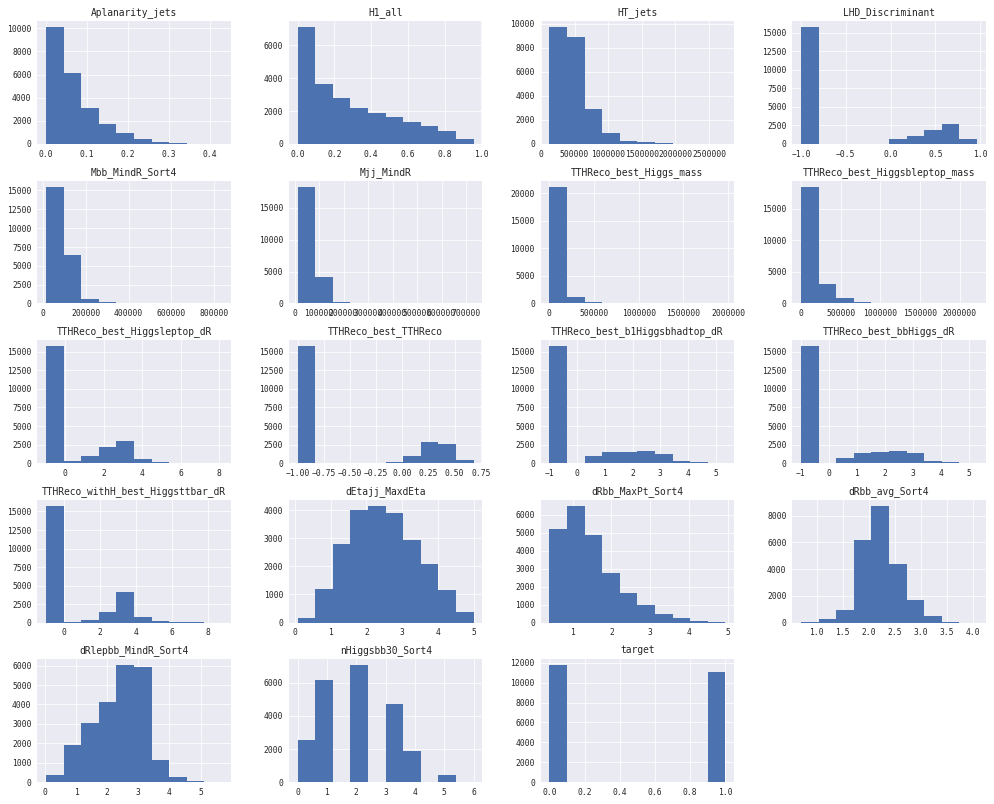

In [10]:
plt.rcParams["figure.figsize"] = (17, 14)
df.hist();

# correlations

## correlations ${t\bar{t}H}$

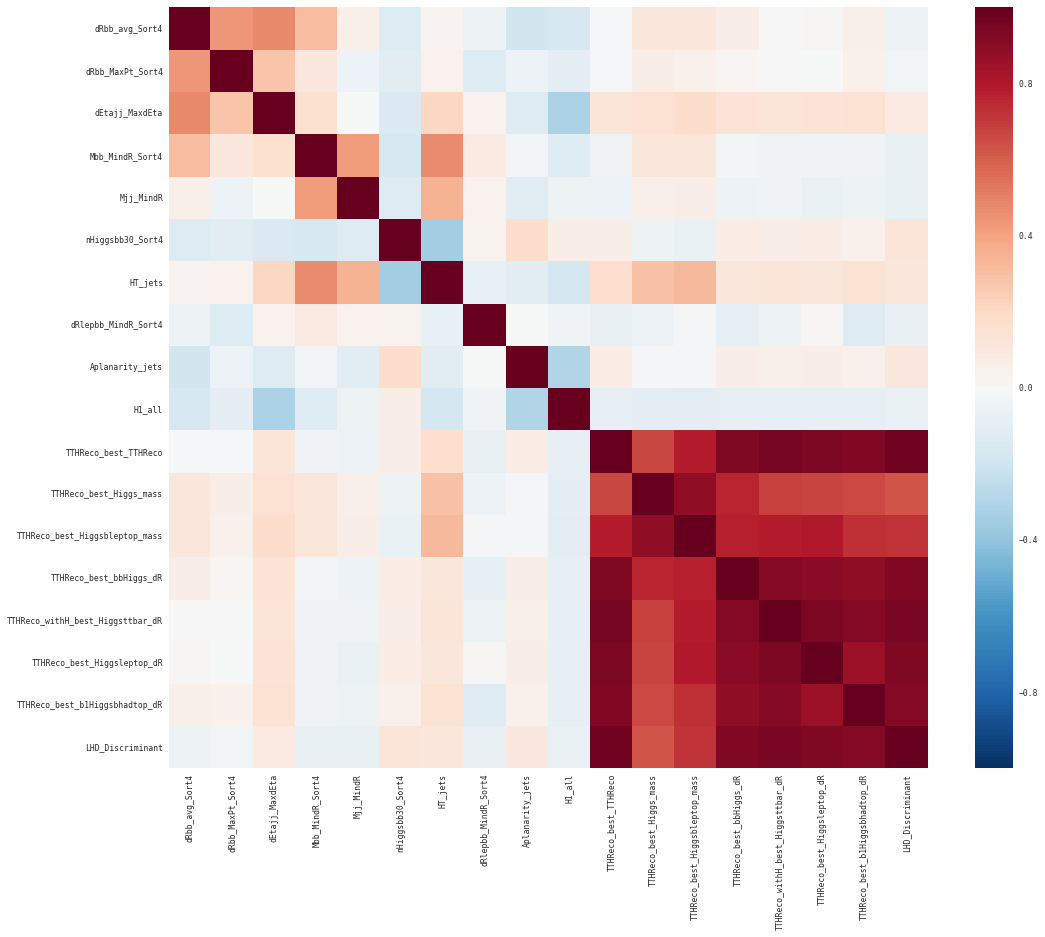

In [11]:
sns.heatmap(df.query("target == 1").drop("target", axis = 1).corr());

## correlations ${t\bar{t}b\bar{b}}$

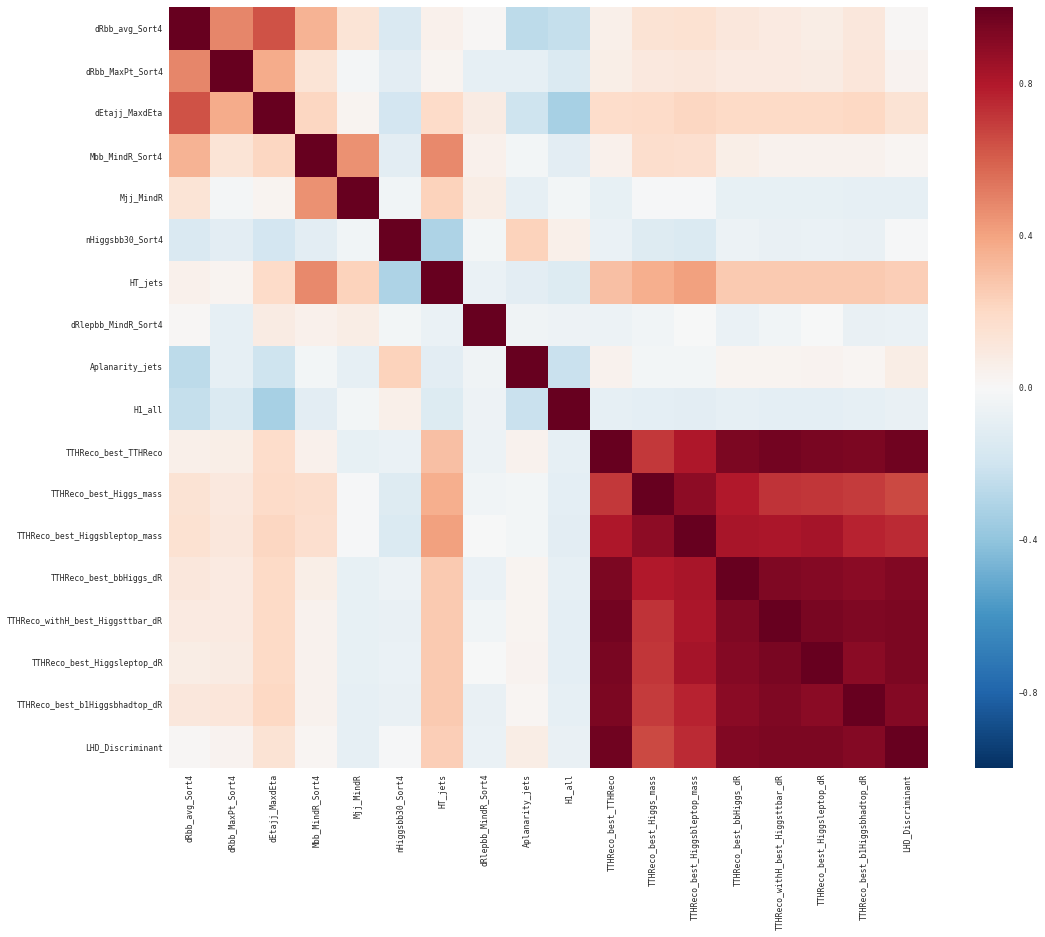

In [12]:
sns.heatmap(df.query("target == 0").drop("target", axis = 1).corr());

## ratio of correlations of ${t\bar{t}H}$ and ${t\bar{t}b\bar{b}}$

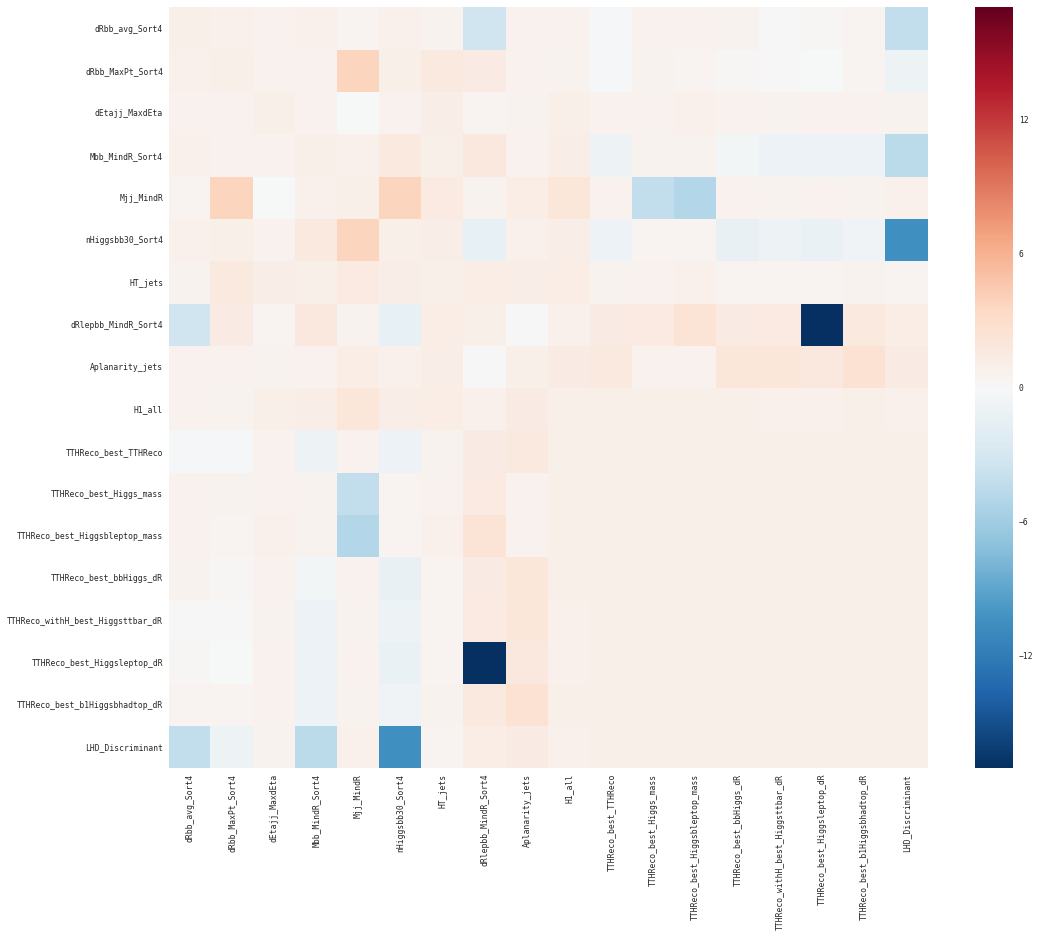

In [13]:
_df = df.query("target == 1").drop("target", axis = 1).corr() / df.query("target == 0").drop("target", axis = 1).corr()

sns.heatmap(_df);

 ## clustered correlations

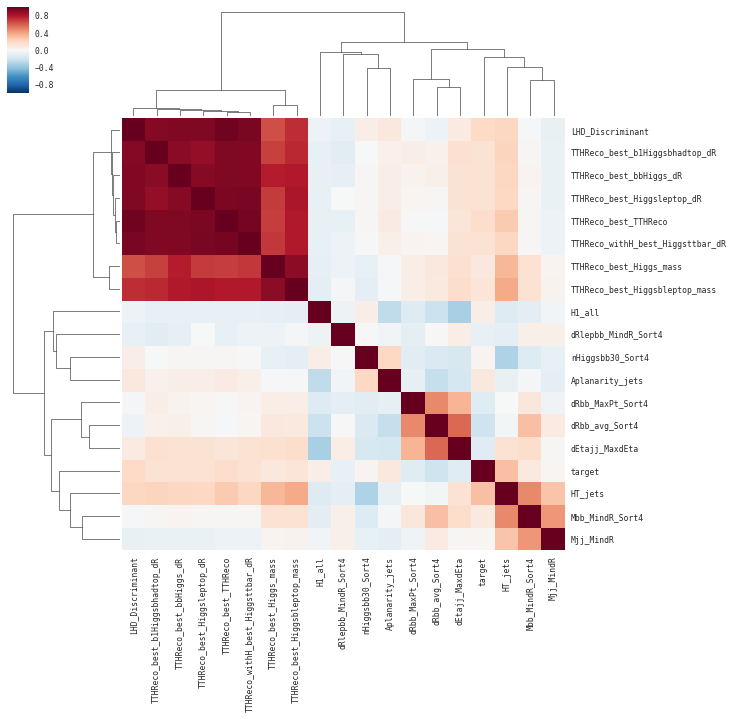

In [14]:
plot = sns.clustermap(df.corr())
plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0);

## strongest correlations and anticorrelations for discrimination of ${t\bar{t}H}$ and ${t\bar{t}b\bar{b}}$

In [15]:
df.corr()["target"].sort_values(ascending = False).to_frame()[1:]

,target
HT_jets,0.299185
LHD_Discriminant,0.203051
TTHReco_best_TTHReco,0.183604
TTHReco_withH_best_Higgsttbar_dR,0.154277
TTHReco_best_bbHiggs_dR,0.152960
TTHReco_best_Higgsleptop_dR,0.150482
TTHReco_best_b1Higgsbhadtop_dR,0.145891
TTHReco_best_Higgsbleptop_mass,0.126561
TTHReco_best_Higgs_mass,0.108195
Aplanarity_jets,0.105632


## strongest absolute correlations for discrimination of ${t\bar{t}H}$ and ${t\bar{t}b\bar{b}}$

In [16]:
df.corr()["target"].abs().sort_values(ascending = False).to_frame()[1:]

,target
HT_jets,0.299185
dRbb_avg_Sort4,0.204813
LHD_Discriminant,0.203051
TTHReco_best_TTHReco,0.183604
TTHReco_withH_best_Higgsttbar_dR,0.154277
TTHReco_best_bbHiggs_dR,0.152960
TTHReco_best_Higgsleptop_dR,0.150482
TTHReco_best_b1Higgsbhadtop_dR,0.145891
TTHReco_best_Higgsbleptop_mass,0.126561
dRbb_MaxPt_Sort4,0.124450


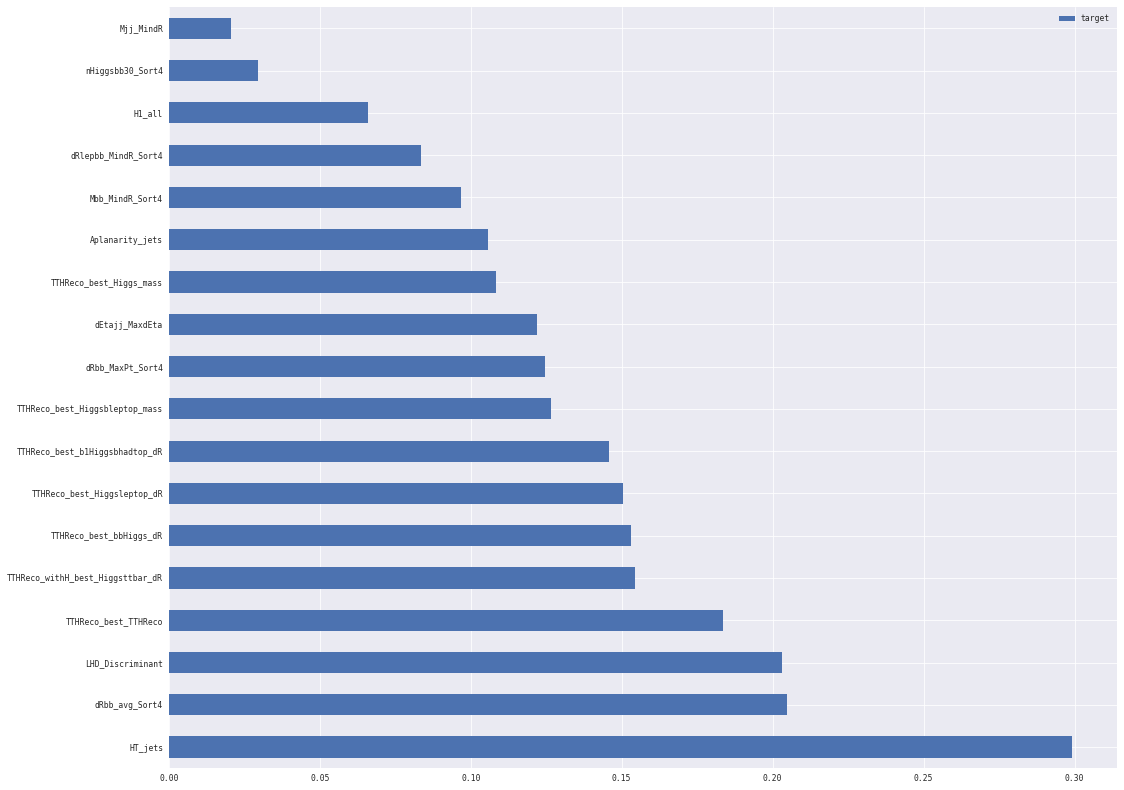

In [17]:
_df = df.corr()["target"].abs().sort_values(ascending = False).to_frame()[1:]
_df.plot(kind = "barh", legend = "False");

## clustered correlations of 10 strongest absolute correlations

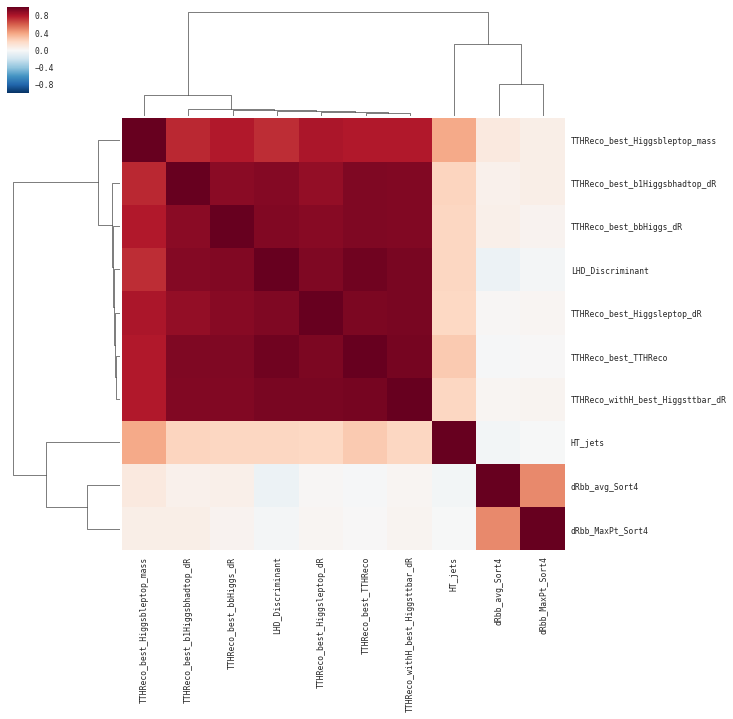

In [18]:
names = df.corr()["target"].abs().sort_values(ascending = False)[1:11].index.values

plot = sns.clustermap(df[names].corr())
plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0);

# rescale

In [19]:
variables_rescale = [variable for variable in list(df.columns) if variable != "target"]

scaler = MinMaxScaler()
df[variables_rescale] = scaler.fit_transform(df[variables_rescale])

df.head()

,dRbb_avg_Sort4,dRbb_MaxPt_Sort4,dEtajj_MaxdEta,Mbb_MindR_Sort4,Mjj_MindR,nHiggsbb30_Sort4,HT_jets,dRlepbb_MindR_Sort4,Aplanarity_jets,H1_all,TTHReco_best_TTHReco,TTHReco_best_Higgs_mass,TTHReco_best_Higgsbleptop_mass,TTHReco_best_bbHiggs_dR,TTHReco_withH_best_Higgsttbar_dR,TTHReco_best_Higgsleptop_dR,TTHReco_best_b1Higgsbhadtop_dR,LHD_Discriminant,target
1,0.265696,0.325133,0.311509,0.017415,0.023733,0.333333,0.029321,0.335150,0.025005,0.836903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.412821,0.174657,0.276681,0.051575,0.062728,0.333333,0.151450,0.509171,0.062811,0.548197,0.595407,0.079543,0.162228,0.348091,0.400588,0.441174,0.262685,0.728361,1
7,0.346333,0.386509,0.081872,0.031549,0.025527,0.000000,0.112252,0.224414,0.152014,0.738440,0.663737,0.082487,0.102262,0.640163,0.398795,0.477156,0.555918,0.712721,1
8,0.427364,0.106369,0.369438,0.070832,0.084710,0.500000,0.058080,0.375719,0.111577,0.508818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
10,0.384440,0.218341,0.438701,0.054052,0.069121,0.500000,0.167710,0.218126,0.671929,0.169410,0.874208,0.029553,0.058182,0.377938,0.374169,0.397906,0.505010,0.815084,1


# save

In [20]:
df.to_csv("ttHbb_data.csv", index = False)